## 2. Train Data with tensorflow

### Setting


In [64]:
pwd

'/Users/woongjae/Desktop/gradu/project'

### Library call

In [10]:
import glob
import yaml
from IPython.display import Image
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import numpy as np
import cv2
import pandas as pd
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import random

In [103]:
#number of training and validation images.
!ls -1 /Users/woongjae/Desktop/gradu/project/dataset_v1/train/images | wc -l
!ls -1 /Users/woongjae/Desktop/gradu/project/dataset_v1/valid/images | wc -l
!ls -1 /Users/woongjae/Desktop/gradu/project/dataset_v1/test/images | wc -l

     802


     202
      68


In [3]:
pwd

'/Users/woongjae/Desktop/gradu/project'

In [4]:
#Function to convert bounding boxes in YOLO
def yolo2box(boxes):
    xmin, ymin = boxes[0] - boxes[2]/2 , boxes[1] - boxes[3]/2
    xmax, ymax = boxes[0] + boxes[2]/2 , boxes[1] + boxes[3]/2
    return xmin, ymin, xmax, ymax

In [5]:
# Function to plot the bounding boxes to their respective images
def plot_box(image, boxes, labels):
    # Need the image height and width to denormalize the bounding box coordinates
    h, w, _ = image.shape
    for box_num, box in enumerate(boxes):
        x1, y1, x2, y2 = yolo2box(box)
        # Denormalizing the coordinates
        xmin = int(x1,w)
        ymin = int(y1,h)
        xmax = int(x2,w)
        ymax = int(y2,h)
        
        thickness = max(2, int(w/275))
        
        cv2.rectangle(
            image,
            (xmin,ymin), (xmax,ymax),
            color = (0,0,255),
            thickness= thickness
        )
    return image

In [92]:
# Function to plot images with the bounding boxes.

def plot(image_path, label_path, num_samples):
    all_images = []
    all_images.extend(glob.glob(image_path+'/*.jpg'))
    all_images.extend(glob.glob(image_path+'/*.JPG'))
    
    all_images.sort()
    
    num_images = len(all_images)
    
    plt.figure(figsize=(15,12))
    
    for i in range(num_samples):
        j = random.randint(0,num_images-1)
        image_name = all_images[j]
        image_name = '.'.join(image_name.split(os.path.sep)[-1].split('.')[:-1])
        image = cv2.imread(all_images[j])
        with open(os.path.join(label_path, image_name + '.txt'),'r') as f:
            boxes = []
            labels = []
            label_lines = f.readlines()
            for label_line in label_lines:
                label = label_line[0]
                box_string = label_line[2:]
                x_c, y_c, w, h = box_string.split('_')
                x_c = float(x_c)
                y_c = float(y_c)
                w = float(w)
                h = float(h)
                boxes.append([x_c,y_c,w,h])
                labels.append(label)
                
        result_image = plot_box(image,boxes,labels)
        plt.subplot(2,2,i+1)
        plt.imshow(result_image[:,:, ::-1])
        plt.axis('off')
    plt.subplots_adjust(wspace=1)
    plt.tight_layout()
    plt.show()
    

In [24]:
pwd

'/Users/woongjae/Desktop/gradu/project'

In [20]:

image_path = 'dataset_v1/train/images/'
label_path = 'dataset_v1/train/labels/'


In [105]:
plot(image_path, label_path, 2)

ValueError: not enough values to unpack (expected 4, got 1)

<Figure size 1500x1200 with 0 Axes>

In [95]:
!pip install ultralytics

In [96]:
EPOCHS = 10
BATCH = 8
IMG_SIZE = 240

In [97]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:01<00:00, 5.98MB/s]


In [106]:
pwd

'/Users/woongjae/Desktop/gradu/project'

In [109]:
!yolo task=detect mode=train model=yolov8n.pt data = /Users/woongjae/Desktop/gradu/project/dataset_v1/data.yaml epochs=25 imgsz=240

New https://pypi.org/project/ultralytics/8.0.142 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.120 🚀 Python-3.11.4 torch-2.0.1 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/Users/woongjae/Desktop/gradu/project/dataset_v1/data.yaml, epochs=25, patience=50, batch=16, imgsz=240, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=Non

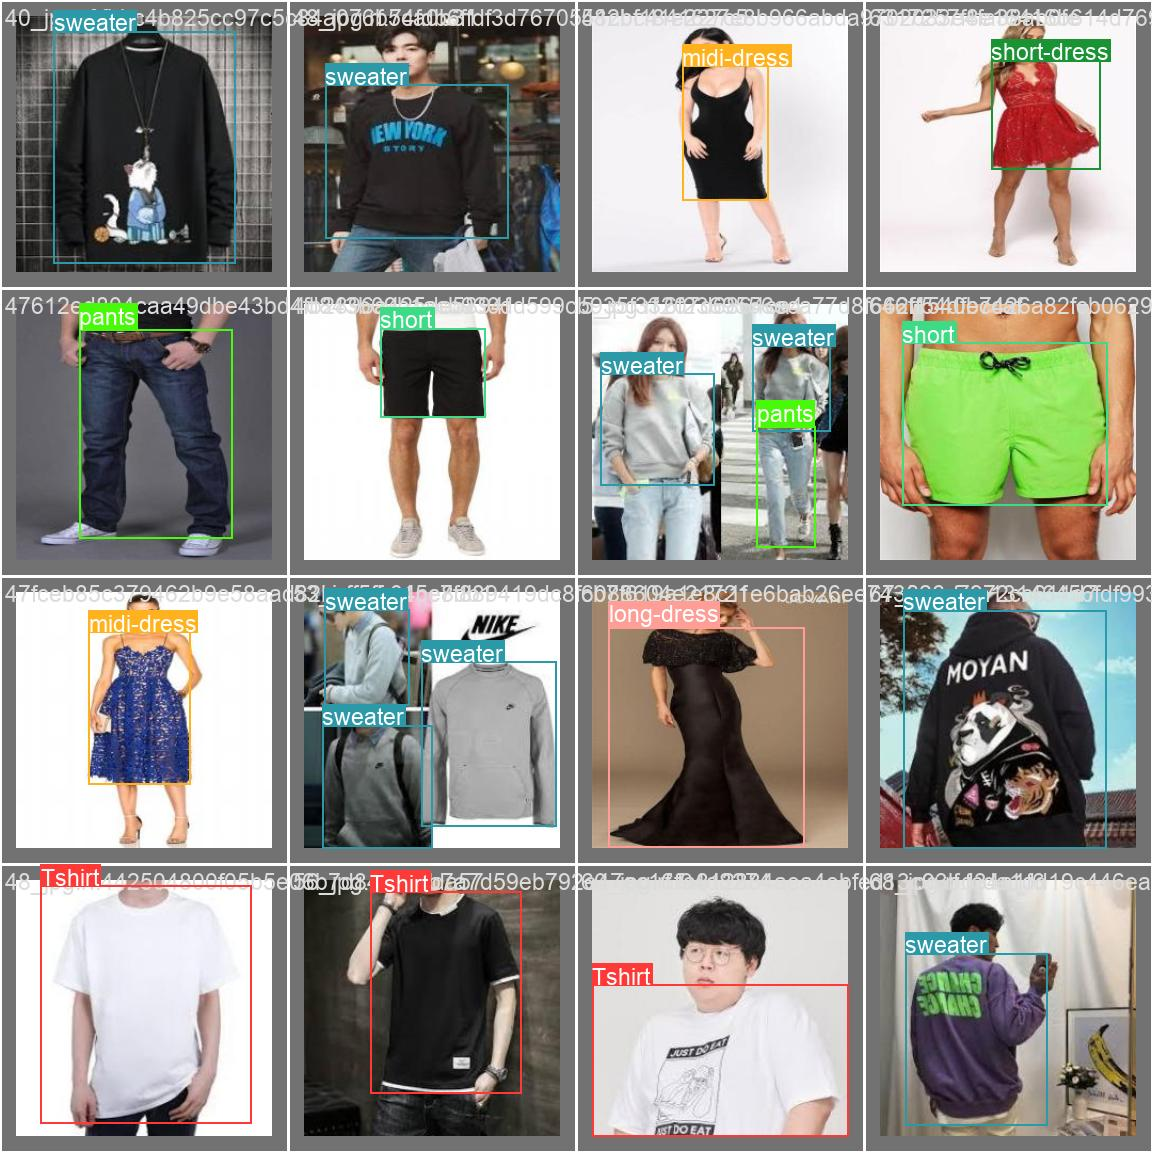

In [110]:
from IPython.display import Image, display

for image_path in glob.glob(f'/Users/woongjae/Desktop/gradu/project/runs/detect/train2/*.jpg')[:1]:
    display(Image(filename=image_path, width = 600))
    print("\n")